<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#区分训练集和测试集" data-toc-modified-id="区分训练集和测试集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>区分训练集和测试集</a></span><ul class="toc-item"><li><span><a href="#通过数据集中的index区分" data-toc-modified-id="通过数据集中的index区分-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>通过数据集中的index区分</a></span></li><li><span><a href="#通过固定ID进行区分" data-toc-modified-id="通过固定ID进行区分-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>通过固定ID进行区分</a></span></li></ul></li><li><span><a href="#使用scikit-learn内置函数" data-toc-modified-id="使用scikit-learn内置函数-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>使用scikit-learn内置函数</a></span></li><li><span><a href="#对数据集进行分层采样" data-toc-modified-id="对数据集进行分层采样-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>对数据集进行分层采样</a></span></li><li><span><a href="#恢复原始数据集" data-toc-modified-id="恢复原始数据集-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>恢复原始数据集</a></span></li><li><span><a href="#查看数据的分布" data-toc-modified-id="查看数据的分布-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>查看数据的分布</a></span></li><li><span><a href="#查看相关系数" data-toc-modified-id="查看相关系数-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>查看相关系数</a></span></li><li><span><a href="#文档值预处理" data-toc-modified-id="文档值预处理-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>文档值预处理</a></span><ul class="toc-item"><li><span><a href="#转换为数字" data-toc-modified-id="转换为数字-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>转换为数字</a></span></li><li><span><a href="#转换为one-hot值" data-toc-modified-id="转换为one-hot值-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>转换为one-hot值</a></span></li><li><span><a href="#直接转换为one-hot值" data-toc-modified-id="直接转换为one-hot值-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>直接转换为one-hot值</a></span></li><li><span><a href="#自定义数据转换类" data-toc-modified-id="自定义数据转换类-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>自定义数据转换类</a></span></li></ul></li><li><span><a href="#特征缩放" data-toc-modified-id="特征缩放-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>特征缩放</a></span><ul class="toc-item"><li><span><a href="#单一pipeline" data-toc-modified-id="单一pipeline-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>单一pipeline</a></span></li><li><span><a href="#FeatureUnion连接多条pipeline" data-toc-modified-id="FeatureUnion连接多条pipeline-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>FeatureUnion连接多条pipeline</a></span></li></ul></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>训练模型</a></span><ul class="toc-item"><li><span><a href="#划分测试集与训练集" data-toc-modified-id="划分测试集与训练集-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>划分测试集与训练集</a></span></li><li><span><a href="#线性回归" data-toc-modified-id="线性回归-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>线性回归</a></span></li><li><span><a href="#决策树" data-toc-modified-id="决策树-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>决策树</a></span><ul class="toc-item"><li><span><a href="#使用一棵树" data-toc-modified-id="使用一棵树-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>使用一棵树</a></span></li><li><span><a href="#交叉验证" data-toc-modified-id="交叉验证-9.3.2"><span class="toc-item-num">9.3.2&nbsp;&nbsp;</span>交叉验证</a></span></li></ul></li><li><span><a href="#保存模型" data-toc-modified-id="保存模型-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>保存模型</a></span></li></ul></li><li><span><a href="#模型微调" data-toc-modified-id="模型微调-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>模型微调</a></span></li><li><span><a href="#解释结果" data-toc-modified-id="解释结果-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>解释结果</a></span></li><li><span><a href="#线上评估" data-toc-modified-id="线上评估-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>线上评估</a></span></li></ul></div>

In [4]:
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import urllib # 从指定URL获取文件
import tarfile # 解压tar.gz文件
import hashlib # 对相应对象取hash值

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" 
HOUSING_PATH = "datasets/housing" 
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    if not os.path.exists(tgz_path):
        urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        print("extracting tgz file ...")
        housing_tgz.extractall(path=housing_path)

fetch_housing_data()

extracting tgz file ...


In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [16]:
print('row number: {:02d}'.format(housing.shape[0]))
print('column number: {:02d}'.format(housing.shape[1]))

row number: 20640
column number: 10


In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

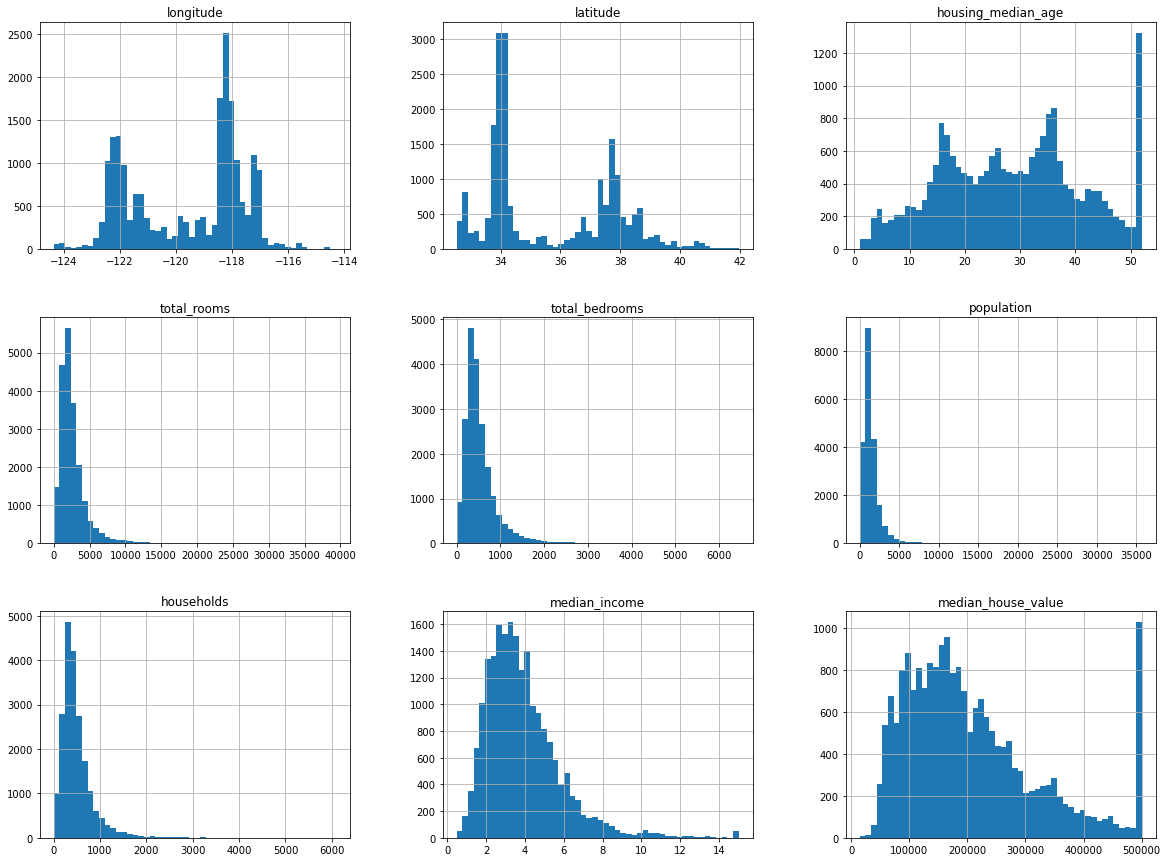

In [28]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
len(housing)

20640

In [32]:
shuffled_indices = np.random.permutation(len(housing))
shuffled_indices

array([6829, 6281, 9340, ..., 8945, 7480, 3718])

## 区分训练集和测试集

### 通过数据集中的index区分

shuffled_indices
test_set_size
test_indices
train_indices

In [57]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set, test_set = split_train_test(housing,0.2)

In [56]:
print("train: ")
train_set.describe()

train: 


longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.582346     35.640661           28.695615   2632.308806   
std        2.003168      2.132795           12.581306   2160.659423   
min     -124.300000     32.540000            1.000000      2.000000   
25%     -121.810000     33.940000           18.000000   1441.000000   
50%     -118.510000     34.260000           29.000000   2125.000000   
75%     -118.010000     37.720000           37.000000   3148.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16345.000000  16512.000000  16512.000000   16512.000000   
mean       537.621780   1422.278706    499.552810       3.870427   
std        419.271913   1118.039834    381.385019       1.909555   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    785.000000    279.000000       2.558800   
50%        434.000000   1164.000000    410.000000       3.527800   
75%        648.000000   1721.250000    606.000000       4.746650   
max       6210.000000  35682.000000   5358.000000      15.000100   

       median_house_value  
count        16512.000000  
mean        207103.668423  
std         115863.616134  
min          14999.000000  
25%         119400.000000  
50%         179500.000000  
75%         265500.000000  
max         500001.000000

In [55]:
print("test: ")
test_set.describe()

test: 


longitude     latitude  housing_median_age   total_rooms  \
count  4128.000000  4128.000000         4128.000000   4128.000000   
mean   -119.519138    35.596664           28.414971   2649.580184   
std       2.004429     2.148433           12.601573   2263.715896   
min    -124.350000    32.560000            2.000000      8.000000   
25%    -121.740000    33.920000           18.000000   1474.000000   
50%    -118.460000    34.230000           28.000000   2132.500000   
75%    -117.980000    37.710000           37.000000   3144.250000   
max    -114.490000    41.920000           52.000000  32627.000000   

       total_bedrooms    population   households  median_income  \
count     4088.000000   4128.000000  4128.000000    4128.000000   
mean       538.865215   1438.268895   499.487161       3.871648   
std        429.780885   1188.456880   386.132112       1.860608   
min          1.000000     11.000000     1.000000       0.499900   
25%        299.000000    795.750000   283.000000       2.587375   
50%        437.000000   1173.000000   409.000000       3.571050   
75%        644.000000   1732.000000   600.000000       4.734700   
max       6445.000000  28566.000000  6082.000000      15.000100   

       median_house_value  
count         4128.000000  
mean        205864.410853  
std         113512.773089  
min          17500.000000  
25%         120075.000000  
50%         180100.000000  
75%         260750.000000  
max         500001.000000

### 通过固定ID进行区分

In [64]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    '''
    data: 原数据集
    test_ratio: 测试集占比
    id_column: 区分训练集与测试集的特征列
    hash: hash方法
    '''
    ids = data[id_column]
    in_test = ids.apply(lambda id_:test_set_check(id_, test_ratio, hash))
    print(in_test)
    return data.loc[~in_test],data.loc[in_test]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')
train_set.describe()

0        False
1        False
2        False
3        False
4         True
         ...  
20635    False
20636    False
20637     True
20638    False
20639    False
Name: index, Length: 20640, dtype: bool


index     longitude      latitude  housing_median_age  \
count  16362.000000  16362.000000  16362.000000        16362.000000   
mean   10281.430082   -119.579973     35.637742           28.654015   
std     5961.623338      2.006218      2.135546           12.549820   
min        0.000000   -124.350000     32.540000            1.000000   
25%     5145.250000   -121.810000     33.930000           18.000000   
50%    10262.000000   -118.500000     34.260000           29.000000   
75%    15441.750000   -118.010000     37.720000           37.000000   
max    20639.000000   -114.310000     41.950000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  16362.000000    16195.000000  16362.000000  16362.000000   
mean    2632.555922      538.261439   1426.899523    499.907591   
std     2168.213087      419.875349   1141.219507    382.124970   
min        6.000000        1.000000      3.000000      1.000000   
25%     1446.000000      295.500000    787.000000    280.000000   
50%     2130.000000      435.000000   1166.000000    410.000000   
75%     3150.750000      648.000000   1727.000000    606.000000   
max    39320.000000     6445.000000  35682.000000   6082.000000   

       median_income  median_house_value  
count   16362.000000        16362.000000  
mean        3.872942       207111.488021  
std         1.903251       115660.835249  
min         0.499900        14999.000000  
25%         2.569000       120000.000000  
50%         3.536650       179700.000000  
75%         4.744900       264775.000000  
max        15.000100       500001.000000

In [50]:
m = hashlib.sha256()
m.update(b'Nobody inspects')
m.digest()
m.hexdigest()

False

In [60]:
m.digest_size
m.block_size
m.name

'sha256'

## 使用scikit-learn内置函数

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set

## 对数据集进行分层采样

In [83]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(cond=housing["income_cat"] < 5, other=5.0, inplace=True)
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  income_cat  
0            NEAR BAY         5.0  
1            NEAR BAY         5.0  
2            NEAR BAY         5.0  
3            NEAR BAY         4.0  
4            NEAR BAY         3.0  
...               ...         ...  
20635          INLAND         2.0  
20636          INLAND         2.0  
20637          INLAND         2.0  
20638          INLAND         2.0  
20639          INLAND         2.0  

[20640 rows x 11 columns]

In [73]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [76]:
strat_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   
...          ...       ...                 ...          ...             ...   
20519    -121.53     38.58                33.0       4988.0          1169.0   
17430    -120.44     34.65                30.0       2265.0           512.0   
4019     -118.49     34.18                31.0       3073.0           674.0   
12107    -117.32     33.99                27.0       5464.0           850.0   
2398     -118.91     36.79                19.0       1616.0           324.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   
...           ...         ...            ...                 ...   
20519      2414.0      1075.0         1.9728             76400.0   
17430      1402.0       471.0         1.9750            134000.0   
4019       1486.0       684.0         4.8984            311700.0   
12107      2400.0       836.0         4.7110            133500.0   
2398        187.0        80.0         3.7857             78600.0   

      ocean_proximity  income_cat  
5241        <1H OCEAN         5.0  
10970       <1H OCEAN         4.0  
20351       <1H OCEAN         3.0  
6568           INLAND         3.0  
13285          INLAND         3.0  
...               ...         ...  
20519          INLAND         2.0  
17430      NEAR OCEAN         2.0  
4019        <1H OCEAN         4.0  
12107          INLAND         4.0  
2398           INLAND         3.0  

[4128 rows x 11 columns]

## 恢复原始数据集

In [84]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"],axis=1,inplace=True)
strat_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   
...          ...       ...                 ...          ...             ...   
20519    -121.53     38.58                33.0       4988.0          1169.0   
17430    -120.44     34.65                30.0       2265.0           512.0   
4019     -118.49     34.18                31.0       3073.0           674.0   
12107    -117.32     33.99                27.0       5464.0           850.0   
2398     -118.91     36.79                19.0       1616.0           324.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   
...           ...         ...            ...                 ...   
20519      2414.0      1075.0         1.9728             76400.0   
17430      1402.0       471.0         1.9750            134000.0   
4019       1486.0       684.0         4.8984            311700.0   
12107      2400.0       836.0         4.7110            133500.0   
2398        187.0        80.0         3.7857             78600.0   

      ocean_proximity  
5241        <1H OCEAN  
10970       <1H OCEAN  
20351       <1H OCEAN  
6568           INLAND  
13285          INLAND  
...               ...  
20519          INLAND  
17430      NEAR OCEAN  
4019        <1H OCEAN  
12107          INLAND  
2398           INLAND  

[4128 rows x 10 columns]

In [85]:
housing_train = strat_train_set.copy()

## 查看数据的分布

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

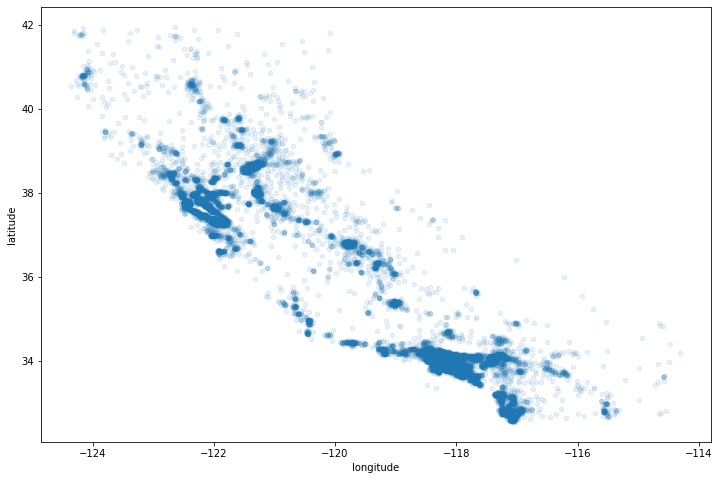

In [89]:
housing_train.plot(kind="scatter",figsize=[12,8], x="longitude",y="latitude",alpha=0.1)

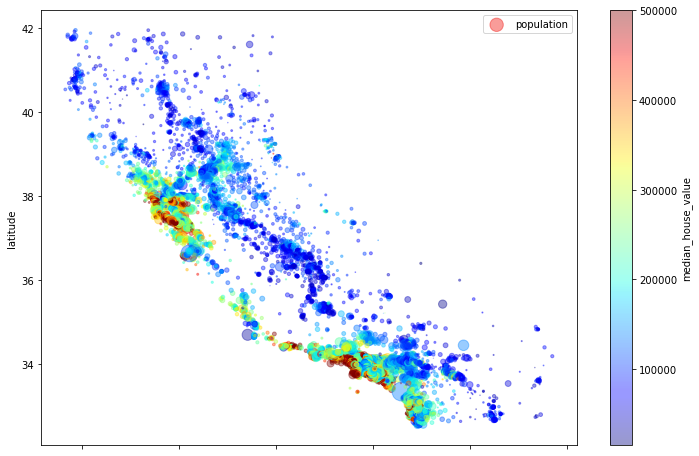

In [110]:
housing.plot(kind="scatter", 
             figsize=[12,8], 
             x="longitude",
             y="latitude",
             alpha=0.4,
             s=housing["population"]/100, 
             label="population",
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True
            )
plt.legend()

## 查看相关系数

In [112]:
corr_matrix = housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
income_cat          -0.010690 -0.085528           -0.146920     0.220528   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   
income_cat                0.015662    0.025809    0.038490       0.902750   

                    median_house_value  income_cat  
longitude                    -0.045967   -0.010690  
latitude                     -0.144160   -0.085528  
housing_median_age            0.105623   -0.146920  
total_rooms                   0.134153    0.220528  
total_bedrooms                0.049686    0.015662  
population                   -0.024650    0.025809  
households                    0.065843    0.038490  
median_income                 0.688075    0.902750  
median_house_value            1.000000    0.643892  
income_cat                    0.643892    1.000000

In [113]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

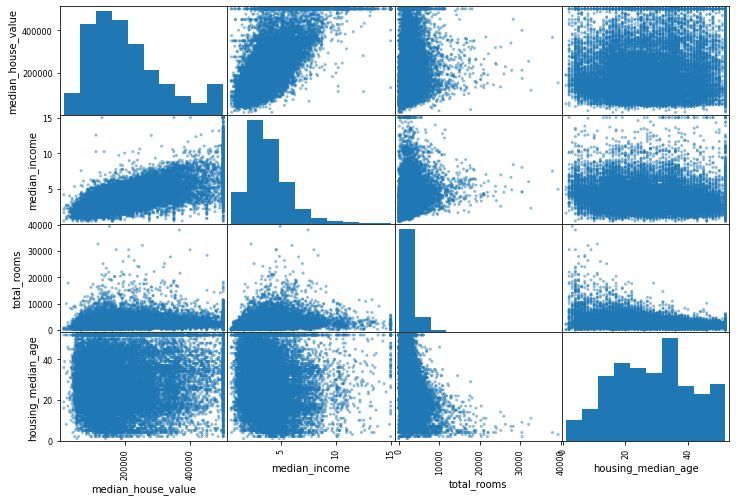

In [115]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [127]:
from sklearn.impute import SimpleImputer
housing_num = housing.drop("ocean_proximity",axis=1)
imputer = SimpleImputer(strategy='median')
housing_num[["total_bderooms"]] = imputer.fit_transform(housing_num[["total_bedrooms"]])
print(imputer.statistics_)
print(housing_num.median())
housing_num

[435.]
longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
income_cat                 3.0000
total_bderooms           435.0000
dtype: float64


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  income_cat  \
0           322.0       126.0         8.3252            452600.0         5.0   
1          2401.0      1138.0         8.3014            358500.0         5.0   
2           496.0       177.0         7.2574            352100.0         5.0   
3           558.0       219.0         5.6431            341300.0         4.0   
4           565.0       259.0         3.8462            342200.0         3.0   
...           ...         ...            ...                 ...         ...   
20635       845.0       330.0         1.5603             78100.0         2.0   
20636       356.0       114.0         2.5568             77100.0         2.0   
20637      1007.0       433.0         1.7000             92300.0         2.0   
20638       741.0       349.0         1.8672             84700.0         2.0   
20639      1387.0       530.0         2.3886             89400.0         2.0   

       total_bderooms  
0               129.0  
1              1106.0  
2               190.0  
3               235.0  
4               280.0  
...               ...  
20635           374.0  
20636           150.0  
20637           485.0  
20638           409.0  
20639           616.0  

[20640 rows x 11 columns]

## 文档值预处理
1. sklearn.preprocessing LabelEncoder
2. sklearn.preprocessing OneHotEncoder
3. sklearn.perprocessing LabelBinarizer
4. sklearn.base BaseEstimator TransformerMixin

### 转换为数字

In [155]:
from sklearn.preprocessing import LabelEncoder

housing_new = housing.copy()
encoder = LabelEncoder()

housing_encoded, housing_categories = housing_new['ocean_proximity'].factorize()
housing_new['ocean_proximity'] = encoder.fit_transform(housing_new['ocean_proximity'])

print(housing_encoded)
print(housing_categories)
print(encoder.classes_)

print(housing_new.nunique())
print(housing_new['ocean_proximity'].value_counts())

print(housing_encoded.reshape(-1,1))

[0 0 0 ... 2 2 2]
Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
income_cat                5
dtype: int64
0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64
[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]


### 转换为one-hot值

In [169]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_onehot = encoder.fit_transform(housing_new['ocean_proximity'].values.reshape(-1,1))
housing_cat_onehot
housing_cat_onehot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [167]:
housing_new['ocean_proximity'].values.shape

(20640,)

### 直接转换为one-hot值

In [173]:
from sklearn.preprocessing import LabelBinarizer
housing_new2 = housing.copy()

encoder = LabelBinarizer()
housing_cat_onehot2 = encoder.fit_transform(housing_new2['ocean_proximity'].values.reshape(-1,1))
housing_cat_onehot2

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [216]:
from sklearn.preprocessing import OrdinalEncoder

housing_new3 = housing.copy()

encoder = OrdinalEncoder()
housing_cat_onehot3 = encoder.fit_transform(housing_new3['ocean_proximity'].values.reshape(-1,1))
print(housing_cat_onehot3)
pd.DataFrame(data=housing_cat_onehot,
             columns=['ocens_proximity'])

[[3.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [1.]]


ocens_proximity
0         (0, 3)\t1.0
1         (0, 3)\t1.0
2         (0, 3)\t1.0
3         (0, 3)\t1.0
4         (0, 3)\t1.0
...               ...
20635     (0, 1)\t1.0
20636     (0, 1)\t1.0
20637     (0, 1)\t1.0
20638     (0, 1)\t1.0
20639     (0, 1)\t1.0

[20640 rows x 1 columns]

### 自定义数据转换类
1. 混入两个基类： BaseEstimator，TransformerMixin
2. 编写 __init__ 方法
3. 覆写 fit() transform() fit_transform() 方法

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_col, bedrooms_col, population_col, household_col = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    '''
    计算三个二次量并添加到原housing数据集中
    rooms_per_houshold [mandatory]
    bedrooms_per_room [optional]
    population_per_houshold [mandatory]
    '''
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self,x, y=None):
        return self
    
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_col] / x[:, household_col]
        population_per_household = x[:, population_col] / x[:,household_col]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:,bedrooms_col] / x[:, rooms_col]
            return np.c_[rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
pd.DataFrame(data=housing_extra_attribs,
             columns=['rooms_per_household','population_per_household'],
            dtype='float32').describe()

rooms_per_household  population_per_household
count         20640.000000              20640.000000
mean              5.428988                  3.070653
std               2.474169                 10.385996
min               0.846154                  0.692308
25%               4.440716                  2.429741
50%               5.229129                  2.818116
75%               6.052381                  3.282261
max             141.909088               1243.333374

## 特征缩放
1. 线性函数归一化 - 减去最小值，然后除以极差
2. 标准化 - 减去平均值，然后除以方差

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

housing_num = housing.drop("ocean_proximity",axis=1)
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

### 单一pipeline

In [13]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
pd.DataFrame(data=housing_num_tr,
             columns=["rooms_per_household"," population_per_household", "bedrooms_per_room"]
            )

rooms_per_household   population_per_household  bedrooms_per_room
0                 0.628559                  -0.049597          -1.029988
1                 0.327041                  -0.092512          -0.888897
2                 1.155620                  -0.025843          -1.291686
3                 0.156966                  -0.050329          -0.449613
4                 0.344711                  -0.085616          -0.639087
...                    ...                        ...                ...
20635            -0.155023                  -0.049110           0.165994
20636             0.276881                   0.005021           0.021671
20637            -0.090318                  -0.071735           0.021134
20638            -0.040211                  -0.091225           0.093467
20639            -0.070443                  -0.043682           0.113275

[20640 rows x 3 columns]

### FeatureUnion连接多条pipeline

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

# sklearn不提供DataFrame向numpy数组的转化，因此需要自己实现
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [12]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


def preprocessing_pipeline(data):
    print(data.shape)
    # 最好使用OneHotEncoder而不用LabelEncoder和LabelBinarizer
    num_attribs = list(data.drop('ocean_proximity',axis=1).columns)
    label_attribs = ['median_house_value']
    other_attribs = list(data.drop(columns=['ocean_proximity','median_house_value'], axis=1).columns)
    cat_attribs = ["ocean_proximity"]
    
    
    num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('scaler', StandardScaler())
    ])
    
    other_pipeline = Pipeline([
        ('selector', DataFrameSelector(other_attribs)),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('encoder', OneHotEncoder())
    ])
    
    label_pipeline = Pipeline([
        ('selector', DataFrameSelector(label_attribs)),
        ('imputer', SimpleImputer(strategy='median'))
    ])

    full_pipeline = FeatureUnion(transformer_list=[
        ('num_pipline', num_pipeline),
        ('other_pipeline', other_pipeline),
        ('cat_pipeline', cat_pipeline),
        ('label_pipeline', label_pipeline)
    ])
    
    return full_pipeline.fit_transform(data)


In [13]:
housing_prepared = preprocessing_pipeline(housing)
print(housing_prepared.shape)
print(housing_prepared[0,:].toarray())

(20640, 10)
(20640, 17)
[[ 6.28559453e-01 -4.95965361e-02 -1.02998783e+00 -1.32783522e+00
   1.05254828e+00  9.82142658e-01 -8.04819097e-01 -9.72476479e-01
  -9.74428597e-01 -9.77032854e-01  2.34476576e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   4.52600000e+05]]


## 训练模型

### 划分测试集与训练集

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_prepared, test_size=0.2, random_state=42)

# train 数据集
train_data = train_set[:,:-1].toarray()
train_label = train_set[:,-1].toarray()

# test 数据集
test_data = test_set[:,:-1].toarray()
test_label = test_set[:,-1].toarray()

### 线性回归

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# build models
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_label)

# make predictions
train_lin_prediction = lin_reg.predict(train_data)
lin_rse = mean_squared_error(train_label, train_lin_prediction)
lin_rmse = np.sqrt(lin_rse)
lin_rmse

67593.20745775253

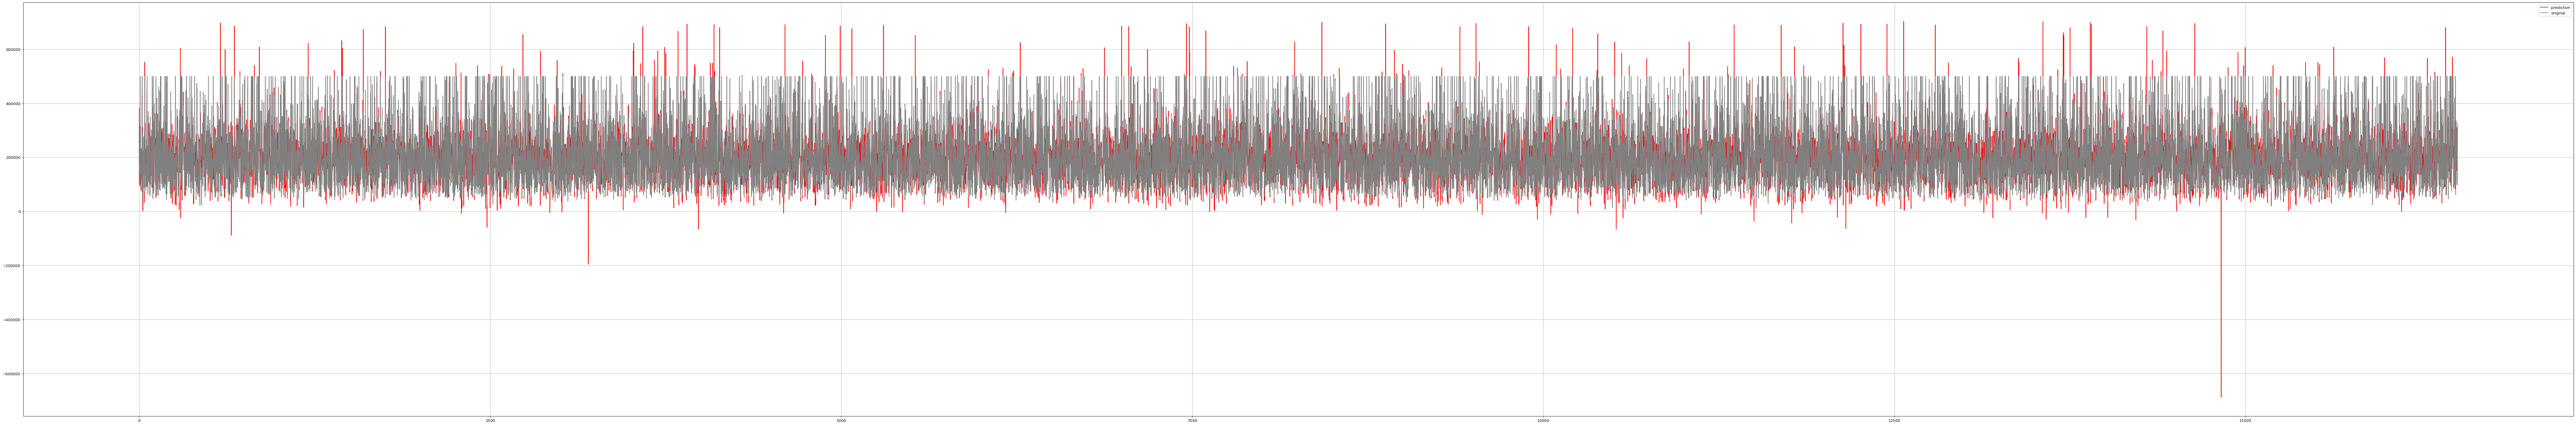

In [62]:
plt.figure(figsize=(120,20),dpi=80)
x = np.arange(train_data.shape[0])
plt.plot(x,train_lin_prediction,label='prediction',color='red')
plt.plot(x,train_label,label='original',color='grey')
plt.legend()
plt.grid()

### 决策树

#### 使用一棵树

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_data, train_label)
train_dtree_prediction = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_label, train_dtree_prediction)
tree_mse

0.0

#### 交叉验证

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         train_data, 
                         train_label, 
                         scoring='neg_mean_squared_error', 
                         cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print('mean: {:.4f}'.format(rmse_scores.mean()))
print('stddev: {:.4f}'.format(rmse_scores.std()))

[63863.41263131 71205.3099711  68638.94044231 70531.28539121
 72334.00225714 68034.16406656 67422.13479983 67871.44519133
 64776.86084791 70238.51660121]
mean: 68491.6072
stddev: 2575.2480


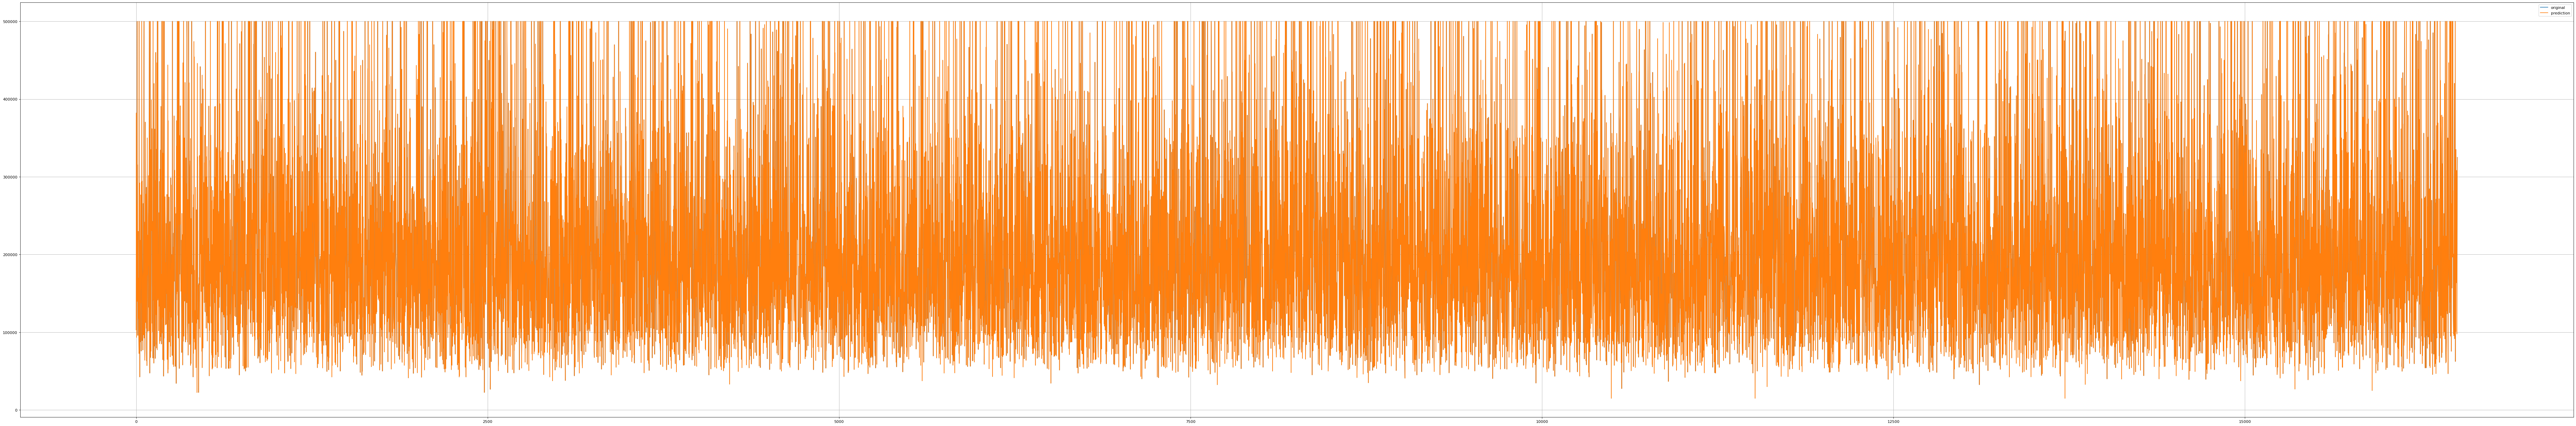

In [53]:
plt.figure(figsize=(120,20),dpi=80)
x = np.arange(train_data.shape[0])
plt.plot(x,train_dtree_prediction,label='prediction')
plt.plot(x,train_label,label='original')
plt.legend()
plt.grid()

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor()
forest_reg.fit(train_data, train_label)
train_forest_prediction = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_label, train_forest_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/var/folders/zh/fmxxp3g1653ccyjmyp5z3bc00000gn/T/ipykernel_29248/3611238154.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(train_data, train_label)


18566.21910176968

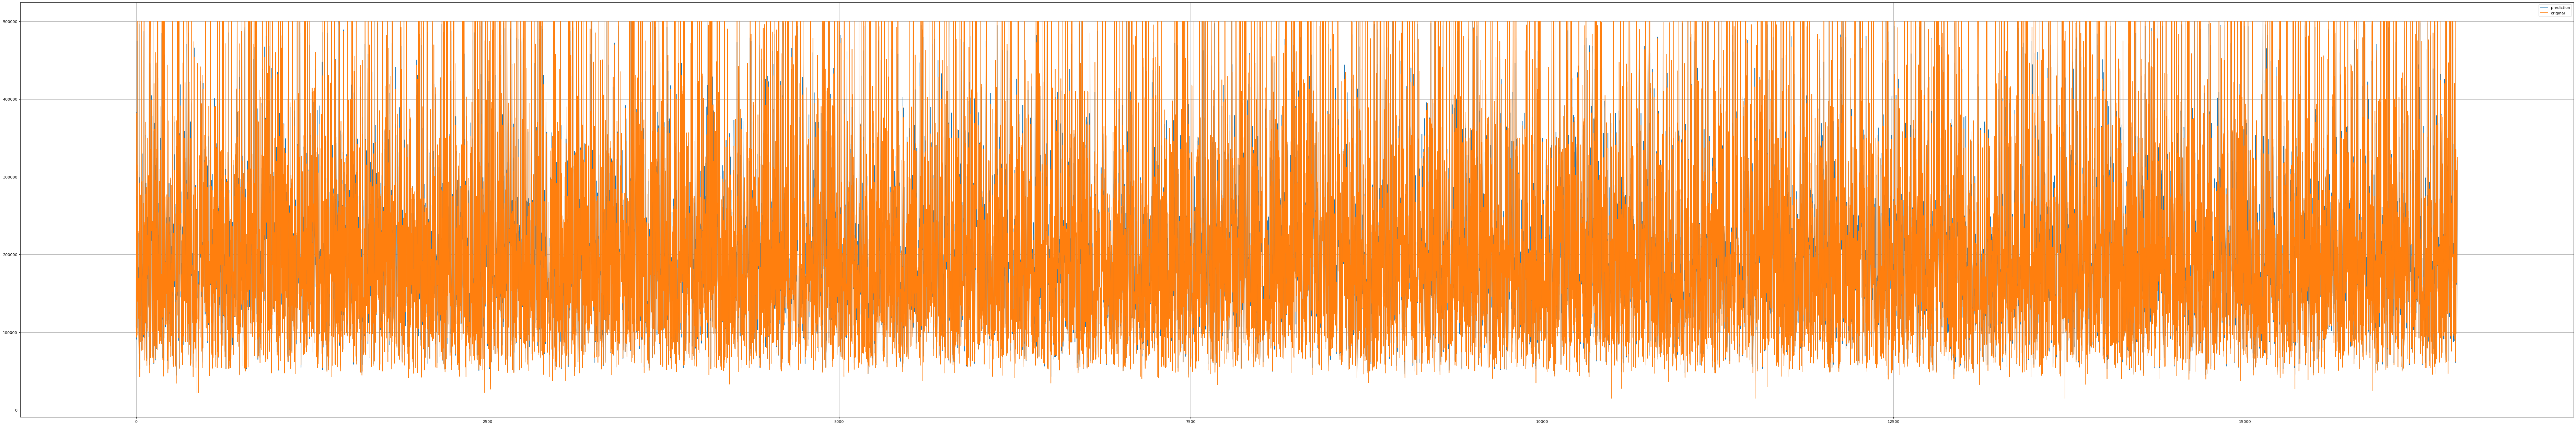

In [69]:
plt.figure(figsize=(120,20),dpi=80)
x = np.arange(train_data.shape[0])
plt.plot(x,train_forest_prediction,label='prediction')
plt.plot(x,train_label,label='original')
plt.legend()
plt.grid()

### 保存模型

In [74]:
import joblib

joblib.dump(forest_reg, 'housing_forest_reg.pkl')
forest_reg_loaded = joblib.load('housing_forest_reg.pkl')

## 模型微调

使用GridSearchCV建立超参数训练器
1. fit()函数开始训练
2. cv_results_属性保存所有信息
3. best_params_属性保存最优超参数

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_label.flatten())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [29]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [30]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score),params)

63303.422222615525 {'max_features': 2, 'n_estimators': 3}
55253.3514592156 {'max_features': 2, 'n_estimators': 10}
52094.87417187177 {'max_features': 2, 'n_estimators': 30}
60304.618675817495 {'max_features': 4, 'n_estimators': 3}
52897.23757639579 {'max_features': 4, 'n_estimators': 10}
50242.50210904894 {'max_features': 4, 'n_estimators': 30}
58157.580707141205 {'max_features': 6, 'n_estimators': 3}
52206.46303242282 {'max_features': 6, 'n_estimators': 10}
50057.30385525134 {'max_features': 6, 'n_estimators': 30}
58440.43913734977 {'max_features': 8, 'n_estimators': 3}
51598.252816126034 {'max_features': 8, 'n_estimators': 10}
49863.36595352825 {'max_features': 8, 'n_estimators': 30}
61726.89792803422 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53785.56021571904 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59662.749865804035 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51906.25920376747 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [26]:
for key in cv_res.keys():
    print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_features
param_n_estimators
param_bootstrap
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [32]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([3.38478983e-02, 1.03524309e-01, 5.73644595e-02, 7.06116249e-02,
       5.97476355e-02, 3.99045148e-02, 1.47227520e-02, 1.38789592e-02,
       1.49083103e-02, 1.35936693e-02, 4.07266695e-01, 1.03028136e-02,
       1.52130337e-01, 2.34875187e-04, 4.19854487e-03, 3.76260122e-03])

In [33]:
final_model = grid_search.best_estimator_

test_pred = final_model.predict(test_data)
final_mse = mean_squared_error(test_label, test_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

49543.71524419966

## 解释结果
1. 展示方案
    1. 学到了什么
    2. 做了什么
    3. 没做什么
    4. 做过什么假设
    5. 系统的限制是什么
2. 记录步骤及事情
3. 用图表进行表达

## 线上评估
1. 监控代码，当系统性能下降时触发报警
2. 评估系统，将人工评估系统植入流水线中
3. 评估输入系统数据的质量
4. 自动化更新数据训练的模型